# Insurance Premium Prediction using Regression Algorithms

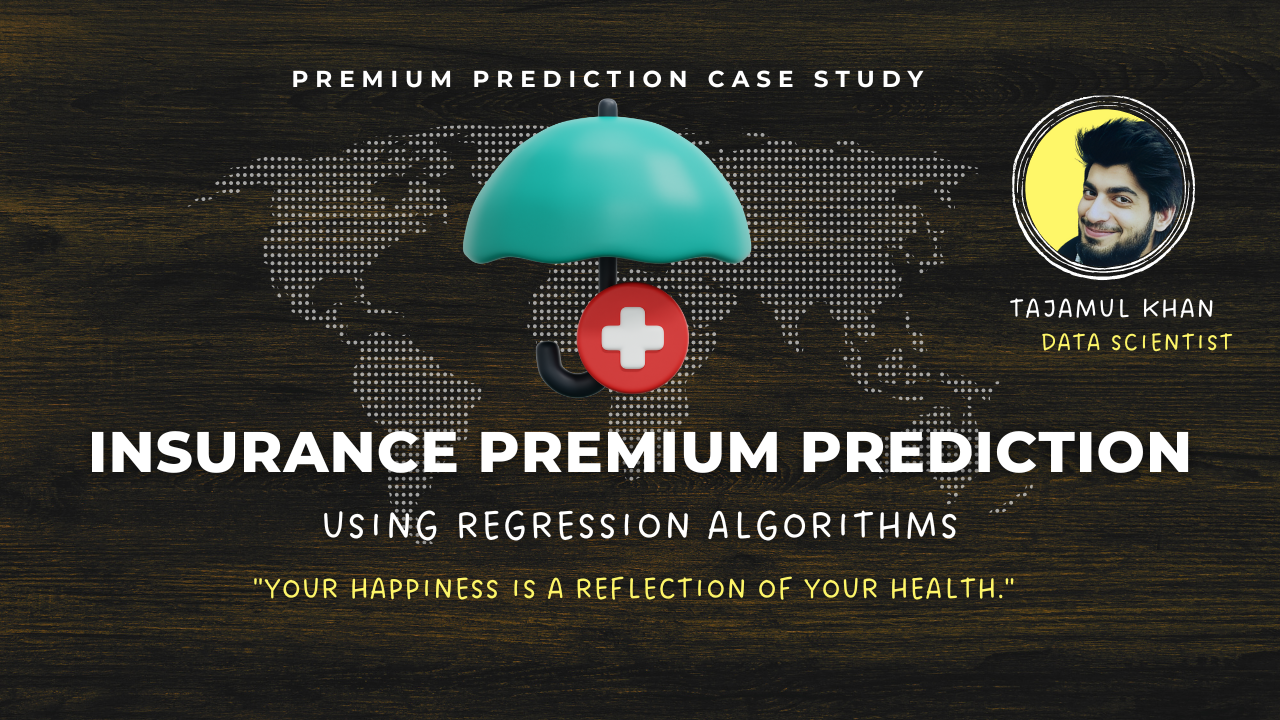

## Problem Statement

The leading Insurance company offers affordable health insurance to thousands of customers. We're tasked with creating an automated system to estimate the annual medical insurance expenditure for new customer, using information such as their age, sex, BMI, children, smoking habits etc.

* Estimates from our system will be used to determine the annual insurance premium charges (amount paid every month) offered to the customer. 

Dataset source: [Kaggle](https://www.kaggle.com/noordeen/insurance-premium-prediction)

## Aim

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. We can do it using the historical data, then we will estimate charges for new customers, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

## Getting Started

### Loading Dataset

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import math
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import *

### Loading Data

In [45]:
data =pd.read_csv('new_insurance_data.csv')

## EDA

In [46]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [47]:
data.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [48]:
data.shape

(1338, 13)

In [49]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [51]:
data.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [52]:
data.isnull().mean() * 100

age                                0.672646
sex                                0.000000
bmi                                0.224215
children                           0.373692
smoker                             0.000000
Claim_Amount                       1.046338
past_consultations                 0.448430
num_of_steps                       0.224215
Hospital_expenditure               0.298954
NUmber_of_past_hospitalizations    0.149477
Anual_Salary                       0.448430
region                             0.000000
charges                            0.000000
dtype: float64

In [53]:
data.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.112849,0.041558,0.123430,0.169275,0.517930,0.136930,0.363041,0.164328,0.294390
bmi,0.112849,1.000000,0.007944,0.093893,0.131246,0.136368,0.257141,0.137575,0.241941,0.198794
children,0.041558,0.007944,1.000000,0.041778,0.054787,0.163522,0.025150,0.185607,0.040070,0.070747
Claim_Amount,0.123430,0.093893,0.041778,1.000000,0.273779,0.400672,0.374159,0.381152,0.409268,0.439161
past_consultations,0.169275,0.131246,0.054787,0.273779,1.000000,0.562344,0.544640,0.503798,0.596322,0.629836
num_of_steps,0.517930,0.136368,0.163522,0.400672,0.562344,1.000000,0.626659,0.850089,0.739426,0.890642
Hospital_expenditure,0.136930,0.257141,0.025150,0.374159,0.544640,0.626659,1.000000,0.657247,0.969695,0.874079
NUmber_of_past_hospitalizations,0.363041,0.137575,0.185607,0.381152,0.503798,0.850089,0.657247,1.000000,0.743466,0.823581
Anual_Salary,0.164328,0.241941,0.040070,0.409268,0.596322,0.739426,0.969695,0.743466,1.000000,0.954255
charges,0.294390,0.198794,0.070747,0.439161,0.629836,0.890642,0.874079,0.823581,0.954255,1.000000


### Visualization

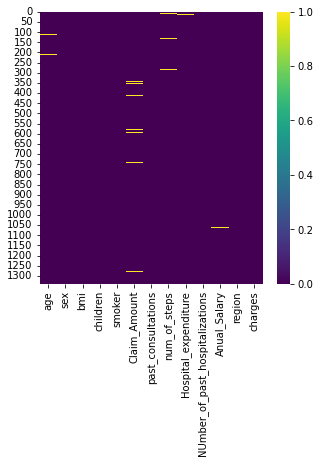

In [54]:
#visualizing null values
plt.figure(figsize = (5,5))
sns.heatmap(data.isnull(), cmap= 'viridis');

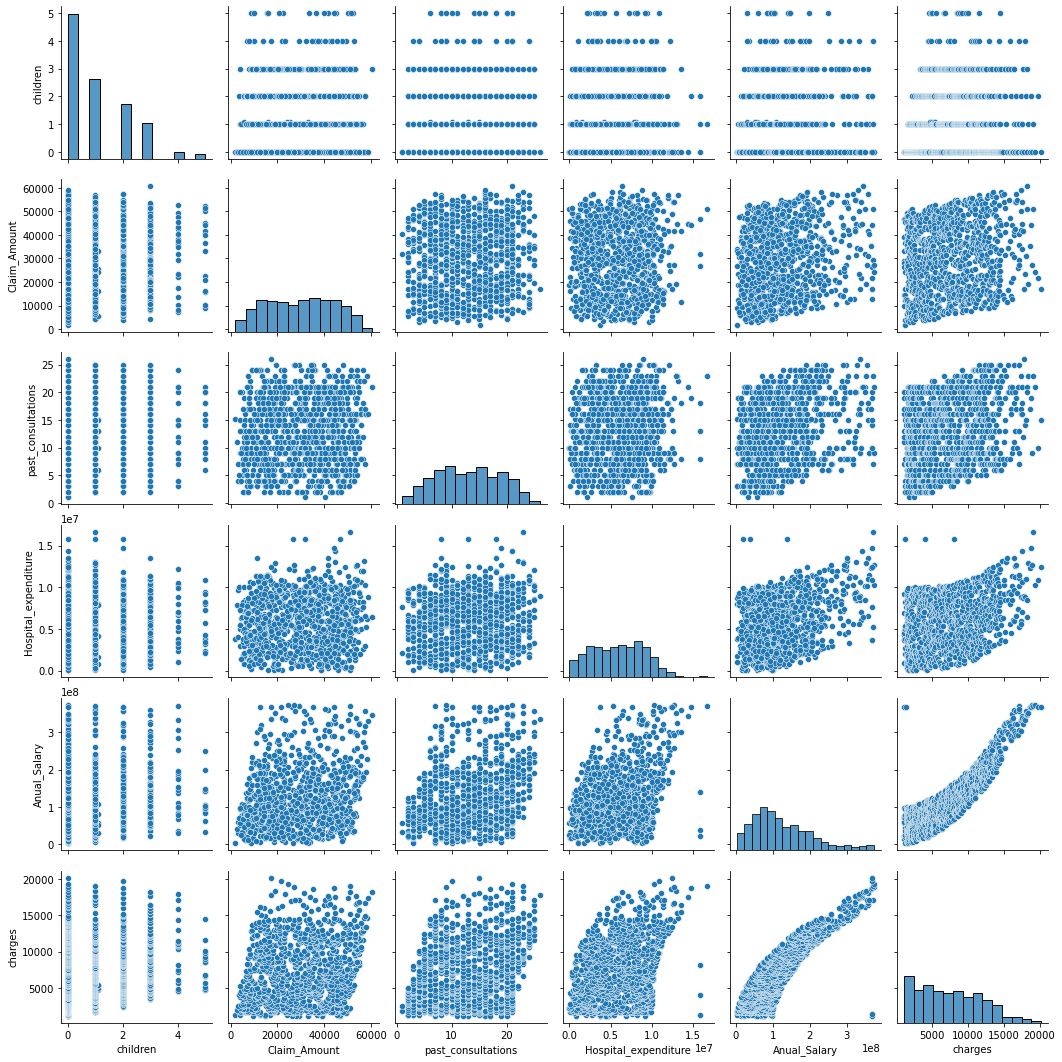

In [88]:
sns.pairplot(data);

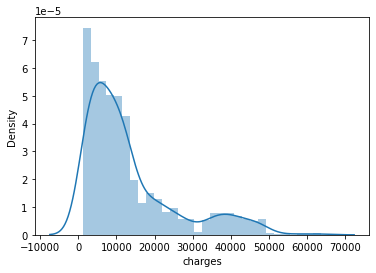

In [55]:
#distribution of target 
sns.distplot(data.charges);

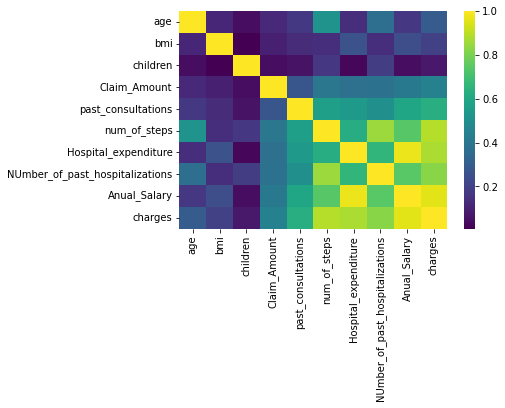

In [56]:
sns.heatmap(data.corr(), cmap = 'viridis');

## Data Preparation

### 1. Duplicate Values

In [58]:
data.duplicated().sum()

0

### 2. Missing Values

Mean or Median for numerical Values?

* Use Median when Data is inconsistent/ Outliers are Very High
* Use Mean when Data has less Outliers

In [59]:
#for float and int values we prefer using mean
#for object type values we prefer using modefor col_name in col:

cols = data.columns

for i in cols:    #Using for loop
    if data[i].dtypes == object:
        data[i] = data[i].fillna(data[i].mode()[0])
    else:
        data[i] = data[i].fillna(data[i].mean())

In [62]:
data.isna().sum()  #after mean/median imputation

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

### 3. Outliers

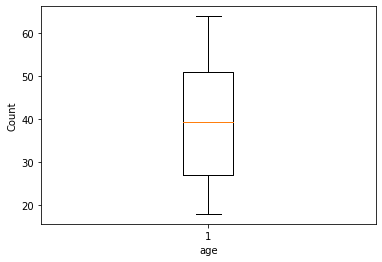

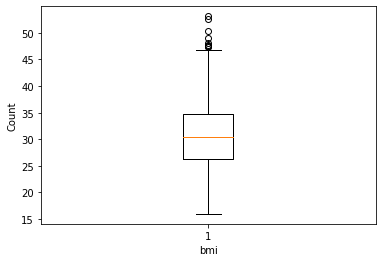

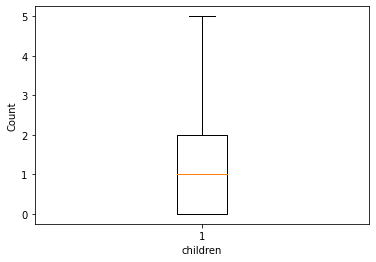

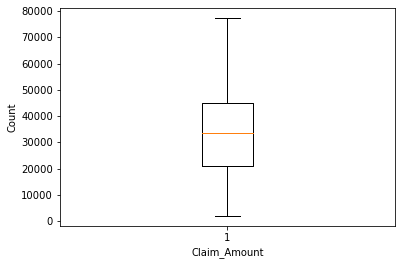

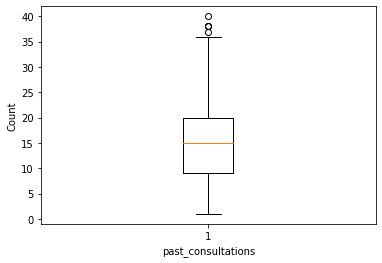

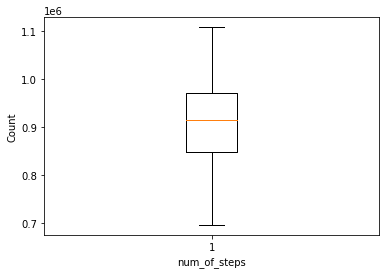

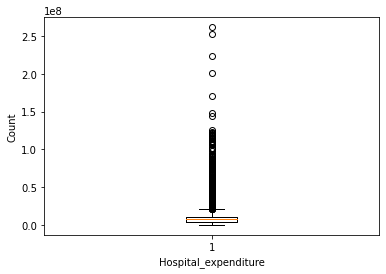

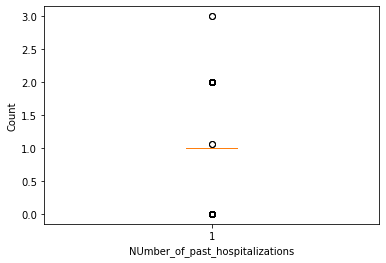

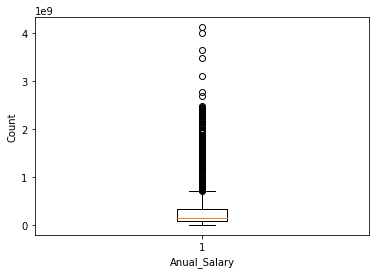

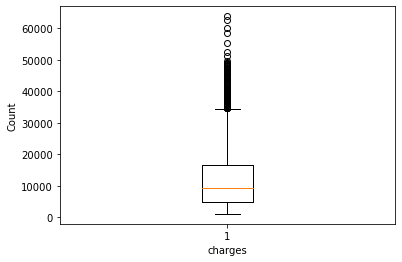

In [63]:
for i in cols:
    if data[i].dtypes == object:
      pass
    else:
      plt.boxplot(data[i])
      plt.xlabel(i)
      plt.ylabel('Count')
      plt.show()

**Treating Outliers**

In [65]:
#For Bmi

Q1 = data.bmi.quantile(0.25)
Q3 = data.bmi.quantile(0.75)
IQR = Q3-Q1
data = data[(data.bmi >= Q1 - 1.5*IQR) & (data.bmi <= Q3 + 1.5*IQR)]

In [66]:
#For past_consultations

Q1 = data.past_consultations.quantile(0.25)
Q3 = data.past_consultations.quantile(0.75)
IQR = Q3-Q1
data = data[(data.past_consultations >= Q1 - 1.5*IQR) & (data.past_consultations <= Q3 + 1.5*IQR)]

In [67]:
#For hospital_expenditure

Q1=data.Hospital_expenditure.quantile(0.25)
Q3=data.Hospital_expenditure.quantile(0.75)
IQR=Q3-Q1
data=data[(data.Hospital_expenditure>=Q1 - 1.5*IQR) & (data.Hospital_expenditure<=Q3 + 1.5*IQR)]

In [68]:
#For Anual_Salary

Q1=data.Anual_Salary.quantile(0.25)
Q3=data.Anual_Salary.quantile(0.75)
IQR=Q3-Q1
data=data[(data.Anual_Salary>=Q1 - 1.5*IQR) & (data.Anual_Salary<=Q3 + 1.5*IQR)]

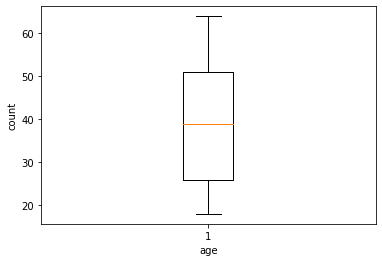

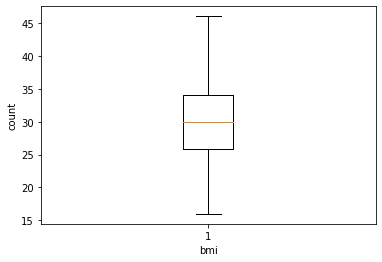

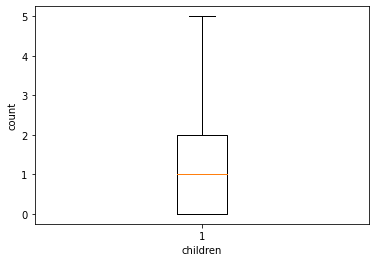

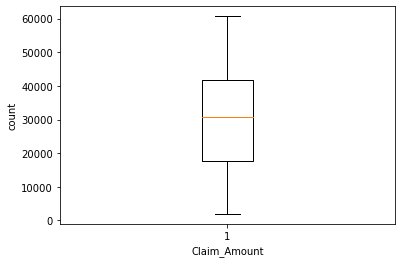

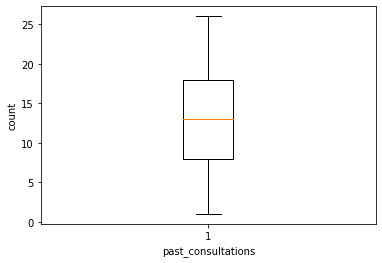

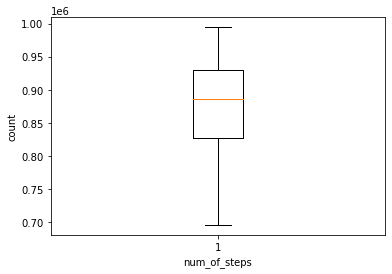

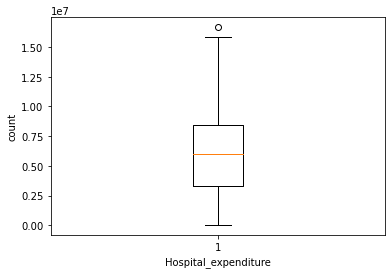

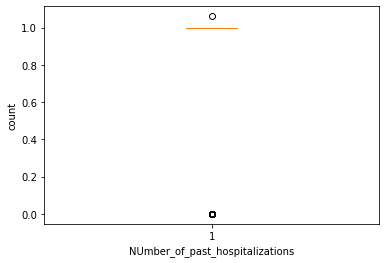

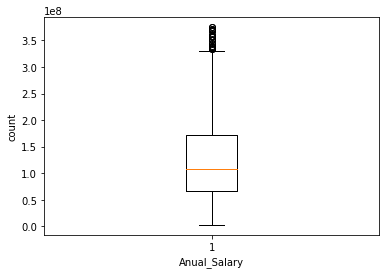

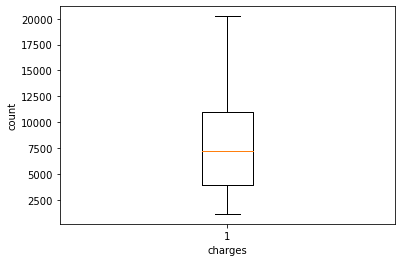

In [69]:
#cheking outlier again 

for i in cols:
    if data[i].dtypes==object:
        pass
    else:
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

### 4. Multi Collinearity

* `one feature is affecting more than one other feature - multicollinearity`

* `we dont want multicollinearity in our dataset`

* `VIF s|hould be less than 6, if more we drop columns`

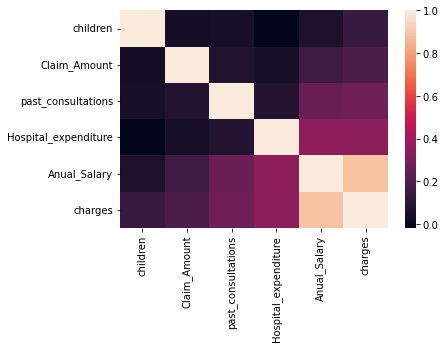

In [79]:
C = data.corr()
sns.heatmap(data = C);

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
col_list=[]
for col in data.columns:
    if((data[col].dtypes!=object)):
        col_list.append(col)
        
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges']

In [74]:
X = data[col_list]

In [75]:
X.columns

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges'],
      dtype='object')

In [76]:
#cheking VIF
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  20.855863
1                              bmi  28.522423
2                         children   2.048766
3                     Claim_Amount   5.657238
4               past_consultations   6.263672
5                     num_of_steps  62.479903
6             Hospital_expenditure   5.189594
7  NUmber_of_past_hospitalizations  12.913721
8                     Anual_Salary  19.873802
9                          charges  35.694534


**How to reduce the VIF ?**

we drop the columns to reduce VIF 

* `VIF should be Less than 6.0`

In [77]:
#dropping columns with high VIF
data=data.drop(['num_of_steps','NUmber_of_past_hospitalizations','age','bmi'],axis=1)

In [78]:
#Comparing to above values of Multi collinearity we have now a reduced score of Collinearity
col_list=[]
for col in data.columns:
    if((data[col].dtypes!=object)&(col!='charges')):
        col_list.append(col)
        
X=data[col_list]

vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0              children  1.706103
1          Claim_Amount  4.144578
2    past_consultations  4.692479
3  Hospital_expenditure  4.253070
4          Anual_Salary  4.249825


## Data Pre Processing

In [91]:
x=data.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=data.iloc[:,-1]

In [92]:
print(x.shape)
print(y.shape)

(1020, 5)
(1020,)


In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

#train_size  - 80% of the data for train Data set
#random_state = could be 0, 1, 85 etc but 42 pattern is standard

In [94]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(816, 5)
(204, 5)
(816,)
(204,)


## Model Building

### 1. Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
linear_reg=LinearRegression()
linear_reg.fit(x_train, y_train) 

LinearRegression()

In [110]:
#To get predictions
y_pred=linear_reg.predict(x_test)

In [111]:
from sklearn.metrics import *

In [118]:
linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print(f"The Mean Squared Error using Linear Regression : ", linear_reg_mse)
print(f"The Root Mean Squared Error using Linear Regression : ", linear_reg_rmse)
print(f"The r2_score using Linear Regression : ", linear_reg_r2_score)

The Mean Squared Error using Linear Regression :  2875138.012556892
The Root Mean Squared Error using Linear Regression :  1695.6231929756364
The r2_score using Linear Regression :  0.8453941586850914


### 2. Decision Tree Regressor

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
decision_tree= LinearRegression()
decision_tree.fit(x_train, y_train)

#To get predictions
y_pred1 = decision_tree.predict(x_test)

In [117]:
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print(f"The Mean Squared Error using Decision Tree Regressor : ",decision_tree_mse)
print(f"The Root Mean Squared Error using Decision Tree Regressor : ", decision_tree_rmse)
print(f"The r2_score using Decision Tree Regressor : ", decision_tree_r2_score)

The Mean Squared Error using Decision Tree Regressor :  2875138.012556892
The Root Mean Squared Error using Decision Tree Regressor :  1695.6231929756364
The r2_score using Decision Tree Regressor :  0.8453941586850914


### 3. Random Forest Regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor

random_forest= RandomForestRegressor()
random_forest.fit(x_train, y_train)

#To get predictions
y_pred2 = decision_tree.predict(x_test)

In [127]:
# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print(f"The Mean Squared Error using Random Forest Regressor : ", random_forest_mse)
print(f"The Root Mean Squared Error using Random Forest Regressor : ", random_forest_rmse)
print(f"The r2_score Error using Random Forest Regressor : ", random_forest_r2_score)

The Mean Squared Error using Random Forest Regressor :  2875138.012556892
The Root Mean Squared Error using Random Forest Regressor :  1695.6231929756364
The r2_score Error using Random Forest Regressor :  0.8453941586850914


### 4. Gradient Boosting

In [131]:
gradient_boosting_reg = GradientBoostingRegressor()

gradient_boosting_reg.fit(x_train, y_train)

#To get predictions
y_pred3 = gradient_boosting_reg.predict(x_test)

In [132]:
# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print(f"The Mean Squared Error using Gradient Boosting Regressor : ", gradient_boosting_mse)
print(f"The Root Mean Squared Error using Gradient Boosting Regressor : ", gradient_boosting_rmse)
print(f"The r2_sccore using Gradient Boosting Regressor : ",gradient_boosting_r2_score)

The Mean Squared Error using Gradient Boosting Regressor :  2495480.062977912
The Root Mean Squared Error using Gradient Boosting Regressor :  1579.7088538645062
The r2_sccore using Gradient Boosting Regressor :  0.8658096435940579


### 5. KNN

In [136]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(x_train, y_train)

#To get predictions
y_pred4 = knn.predict(x_test)

In [137]:
# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print(f"The mean squared error using KNN is ",knn_mse)
print(f"The root mean squared error using KNN is ",knn_rmse)
print(f"The r2_score using KNN is ",knn_r2_score)

The mean squared error using KNN is  3365548.251499002
The root mean squared error using KNN is  1834.5430634081615
The r2_score using KNN is  0.8190231506674058


### 6. XGBoost

In [138]:
xgb = xgb.XGBRegressor()

In [141]:
xgb.fit(x_train, y_train)

#To get predictions
y_pred5 = xgb.predict(x_test)

In [142]:
# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_pred5)
xgb_reg_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgb_reg_r2_score = r2_score(y_test, y_pred5)

print(f"The mean square error using XGBoost is ",xgb_reg_mse)
print(f"The root mean_squared error using XGBoost is ",xgb_reg_rmse)
print(f"The r2 score using XGBoost is ", xgb_reg_r2_score)

The mean square error using XGBoost is  3527835.0508674686
The root mean_squared error using XGBoost is  1878.2531913635787
The r2 score using XGBoost is  0.8102964436220099


### To Get Best Performing Model

In [143]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN', 'XGBoost'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse, xgb_reg_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gradient_boosting_r2_score, knn_r2_score, xgb_reg_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,1579.708854,0.865810
0,Linear Regression,1695.623193,0.845394
1,Decision Tree,1695.623193,0.845394
2,Random Forest,1695.623193,0.845394
4,KNN,1834.543063,0.819023
5,XGBoost,1878.253191,0.810296


## Conclusion

From the above observation we can say that the performance (RMSE & R-sqaured) of Gradient boosting model is good as compared to other models. So we will save Gradient boosting model for further testing of the data.